# 12-1 datetime 오브젝트
datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리입니다. datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있습니다. 앞으로 3개의 오브젝트를 명확히 구분하기 위해 영문을 그대로 살려 date, time, datetime 오브젝트라고 부르겠습니다.
### datetime 오브젝트 사용하기
#### 1.
datetime 오브젝트를 사용하기 위해 datetime 라이브러리를 불러옵니다.

In [3]:
from datetime import datetime

#### 2.
now, today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있습니다.

In [4]:
now1=datetime.now()
print(now1)

2021-09-22 19:42:22.761882


In [7]:
now2=datetime.today()
print(now2)

2021-09-22 19:42:52.825809


#### 3.
다음은 datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달한 것입니다. 각 변수를 출력하여 확인해 보면 입력한 시간을 바탕으로 datetime 오브젝트가 생성된 것을 알 수 있습니다.

In [8]:
t1=datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2021-09-22 19:44:19.138062
1970-01-01 00:00:00
1970-12-12 13:24:34


#### 4.
datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점입니다. 다음은 두 datetime 오브젝트의 차이를 구한 것입니다.

In [10]:
diff1=t1-t2
print(diff1)
print(type(diff1))

18892 days, 19:44:19.138062
<class 'datetime.timedelta'>


In [11]:
diff2=t2-t1

print(diff2)
print(type(diff2))

-18893 days, 4:15:40.861938
<class 'datetime.timedelta'>


## datetime 오브텍트로 변환하기 - to_datetime 메서드
경우에 따라서는 시게열 데이터를 문자열로 저장해야 할 때도 있습니다. 하지만 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해 주어야 합니다. 이번에는 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환하는 방법에 대해 알아보겠습니다.

### 문자열 datetime 오브젝트로 변환하기
#### 1.
먼저 ebola 데이터 집합을 불러옵니다.

In [12]:
import pandas as pd
import os

ebola=pd.read_csv('data/country_timeseries.csv')

#### 2.
ebola 데이터프레임을 보면 문자열로 지정된 Date 열이 있는 것을 알 수 있습니다.

In [13]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

#### 3.
to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있습니다. 다음과 같이 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오르젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가합니다.

In [14]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 4.
to_datetime 메서드를 좀 더 자세히 알아볼까요? 시간 형식 지정자와 기호를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있습니다. 다음 실습을 참고하여 format 인자의 사용법을 꼭 익혀두세요.

In [19]:
test_df1=pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [21]:
test_df2=pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


## 시간 형식 지정자
다음은 시간 형식 지정자를 정리한 표입니다. 이 장의 실습에서 종종 사용하므로 한 번 읽고 넘어가기 바랍니다.
### 시간 형식 지정자
- 시간 형식 지정자 : 의미 : 결과
- %a : 요일 출력 : Sun,Mon,...Set
- %A : 요일 출력(긴 이름) : Sunday,Monday, ...,Saturday
- %w : 요일 출력(숫자,0부터 일요일) : 0,1,....,6
- %d : 날짜 출력(2자리로 표시) : 01,02,....,31
- %b : 월 출력 : Jan,Feb,....Dec
- %B : 월 출력(긴 이름) : January,February,...December
- %m : 월 출력(숫자) : 01,02,...,12
- %y : 년 출력(2자리로 표시) : 00,01,...,99
- %Y : 년 출력(4자리로 표시) : 0001,0002,...,2013,2014,...,9999
- %H : 시간 출력(24시간) : 01,02,...,23
- %I : 시간 출력(12시간) : 01,02,...,12
- %p : AM 또는 PM 출력 : AM,PM
- %M : 분 출력(2자리로 표시) : 00,01,...,59
- %S : 초 출력(2자리로 표시) : 00,01,...,59
- %f : 마이크로초 출력 : 000000,000001,...,999999
- %z : UTC 차이 출력(+HHMM이나 -HHMM형태) : (None),+0000,-0400,+1030
- %Z : 기준 지역 이름 출력 : (None),UTC,EST,CST
- %j : 올해의 지난 일 수 출력(1일,2일,...) : 001,002,...,366
- %U : 올해의 지난 주 수 출력(1주,2주,...) : 00,01,...,53
- %c : 날짜와 시간 출력 : Tue Aug 16 21:30:00 1988
- %x : 날짜 출력 : 08/16/88(None);08/16/1988
- %X : 시간 출력 : 21:30:00
- %G : 년 출력(ISO 8601 형식) : 0001,0002,...,2013,2014,...,9999
- %u : 요일 출력(ISO 8601 형식) : 1,2,...,7
- %V : 올해의 지난 주 수 출력(ISO 8601 형식) : 01,02,...,53

### 시계열 데이터를 구분해서 추출하고 싶어요
now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현합니다. 하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 합니다. 다음은 strftime 메서드와 시간 형식 지정자를 이용하여 시게열 데이터를 잘라낸 것입니다.

In [22]:
now=datetime.now()
print(now)

2021-09-22 20:32:20.430239


In [23]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2021-09-22


In [24]:
nowTime=now.strftime('%H:%M:%S')
print(nowTime)

20:32:20


In [25]:
nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2021-09-22 20:32:20


## datetime 오브젝트로 변환하기 - read_csv 메서드
앞에서는 to_datetime 메서드를 사용하여 문자열로 저장되어 있는 Date 열을 datetime오브젝트로 변환했습니다. 하지만 datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단합니다. 다음 실습을 통해 알아보겠습니다.
### datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기
#### 1. 
다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것입니다. 결과를 보면 Date 열이 문자열이 아니라 datetime 오브젝트라는 것을 확인할 수 있습니다.

In [27]:
ebola1 =pd.read_csv('data/country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## datetime 오브젝트에서 날짜 정보 추출하기
datetime 오브젝트에 년,월,일과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어 있습니다. 다음 실습을 통해 datetime 오브젝트에서 날짜 정보를 하나씩 추출해 보겠습니다
### datetime 오브젝트에서 날짜 정보 추출하기
#### 1.
다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것입니다.

In [28]:
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


#### 2.
datetime 오브젝트의 year,month,day 속성을 이용하면 년,월,일 정보를 바로 추출할 수 있습니다.

In [29]:
print(d1[0].year)

2018


In [30]:
print(d1[0].month)

5


In [31]:
print(d1[0].day)

16


## dt 접근자 사용하기
문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 했습니다. datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있습니다.
### dt 접근자로 시계열 데이터 정리하기
#### 1.
먼저 ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열로 추가합니다.

In [32]:
ebola=pd.read_csv('data/country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

#### 2.
다음은 dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년,월,일 데이터를 추출한 것입니다.

In [33]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [34]:
print(ebola['date_dt'][3].year)

2015


In [35]:
print(ebola['date_dt'][3].month)

1


In [36]:
print(ebola['date_dt'][3].day)

2


#### 3.
과정 2와 같은 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편합니다. 다음은 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한 것입니다. 추출한 연도값은 ebola 데이터프레임의 새로운 열로 추가했습니다.

In [37]:
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


#### 4.
다음은 과정 3을 응용하여 월,일 데이터를 한 번에 추출해서 새로운 열로 추가한 것입니다.

In [38]:
ebola['month'],ebola['day']=(ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


#### 5.
다음은 ebola 데이터프레임에 새로 추가한 date_dt, year, month,day 열의 자료형을 출력한 것입니다. date_dt열은 datetime 오브젝트이고 나머지는 정수형이라는 것을 알 수 있습니다.

In [39]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#  12-2 사례별 시계열 데이터 계산하기
### 에볼라 최초 발병일 계산하기
#### 1.
ebola 데이터프레임의 마지막 행과 열을 5개씩만 살펴보겠습니다. ebola 데이터프레임은 데이터가 시간 역순으로 정렬되어 있습니다. 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 합니다.

In [40]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


#### 2.
121행에서 볼 수 있듯이 에볼라가 발생하기 시작한 날은 2014년 03월 22일입니다. 다음은 min. 메서드를 사용하여 에볼라의 최초 발병일을 찾은 것입니다.

In [42]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 3.
에볼라의 최초 발병일을 알아냈으니 Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있습니다.

In [43]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


### 파산한 은행의 개수 계산하기
이번에는 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산해 보겠습니다. 그리고 이번에는 그래프로도 시각화해 보겠습니다.
#### 1. 
다음은 파산한 은행 데이터 집합을 불러온 것입니다. banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 알 수 있습니다.

In [44]:
banks=pd.read_csv('data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


#### 2.
Closing date,Update Date 열의 데이터 자료형은 문자열입니다. 다음은 read_csv 메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러온 것입니다.

In [45]:
banks_no_dates=pd.read_csv('data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [46]:
banks=pd.read_csv('data/banklist.csv',parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


#### 3.
dt 접근자와 quater 속성을 이용하면 은행이 파산한 분기를 알 수 있습니다. 다음은 dt 접근자와 year,quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것입니다.

In [47]:
banks['closing_quarter'],banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

#### 4.
이제 연도별로 파산한 은행이 얼마나 되는지를 알아볼까요? grouby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있습니다.

In [48]:
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


#### 5.
각 연도별, 분기별로 파산한 은행의 개수도 알아보겠습니다. 다음은 banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한 것입니다.

In [50]:
closing_year_q=banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

#### 6.
다음은 과정 5에서 얻은 값으로 그래프를 그린 것입니다.

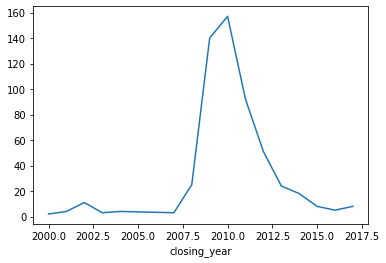

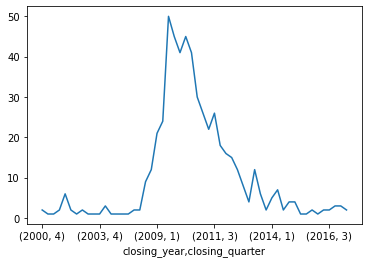

In [51]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
ax=closing_year.plot()
plt.show()

fig, ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()

### 테슬라 주식 데이터로 시간 계산하기
이번에는 pandas=datareader 라이브러리를 이용하여 주식 데이터를 불러오겠습니다. 이라이브러리는 지금까지 설치한 적이 없는 라이브러리입니다. 다음을 아나콘다 프롬프트에 입력하여 pandas-datareader 라이브러리를 설치하세요.

In [52]:
pip install pandas-datareader

     |████████████████████████████████| 109 kB 14.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
